In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_features=2, centers=1, cluster_std=[1], random_state=0, n_samples=100)
test_normal = X[:4]
train = X[4:]
test_anomaly = np.array([[0, 0], [-2.5, 2], [5, 4], [-2, 7]])

In [2]:
df = pd.read_csv("../../../../data/test/sample_lof.csv", index_col=0)

In [5]:
df.describe()

,x,y
count,104.000000,104.000000
mean,0.922096,4.394395
std,1.162710,1.146806
min,-2.500000,0.000000
25%,0.112652,3.649649
50%,0.875434,4.408400
75%,1.662764,5.162266
max,5.000000,7.000000


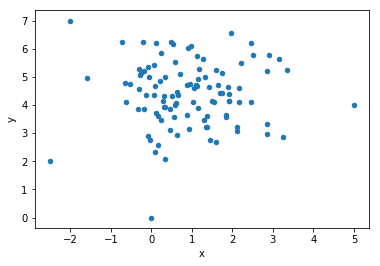

In [4]:
df.plot.scatter("x", 'y')

In [3]:
# fit the model
clf = LocalOutlierFactor(n_neighbors=10)
y_pred = clf.fit_predict(df)

/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


In [4]:
# lof のスコア？
df["s"] = clf.negative_outlier_factor_

In [5]:
from IPython.display import display
df.sort_values("s")

,x,y,s
object_id,,,
1,-2.500000,2.000000,-3.356054
3,-2.000000,7.000000,-3.008737
0,0.000000,0.000000,-2.860503
2,5.000000,4.000000,-2.533575
68,-1.576720,4.957406,-2.076382
33,3.246025,2.849422,-1.846044
77,-0.730000,6.254563,-1.584396
90,3.359415,5.248267,-1.569307
56,2.843828,3.326509,-1.543731


## calc dist

In [21]:
from scipy.spatial import distance_matrix

dist_df= pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)

In [22]:
dist_map = dist_df.to_dict()

In [23]:
df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
             94,  95,  96,  97,  98,  99, 100, 101, 102, 103],
           dtype='int64', name='object_id', length=104)

In [24]:
dist_df

object_id,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
object_id,,,,,,,,,,,,,,,,,,,,,
0,0.000000,3.201562,6.403124,7.280110,6.214917,2.324675,4.771054,3.491691,4.357836,3.272693,...,2.994212,6.251638,5.088796,4.795012,4.785539,6.294803,3.682766,5.208040,4.410333,5.069344
1,3.201562,0.000000,7.762087,5.024938,4.959335,2.608558,3.386046,4.057140,3.343106,3.619763,...,3.257506,5.175992,3.799752,5.030431,5.395240,6.271141,4.057177,3.951054,3.947761,4.680566
2,6.403124,7.762087,0.000000,7.615773,5.363202,5.189927,5.564836,3.712591,5.140452,4.153926,...,4.506868,5.043218,5.386175,3.099116,2.531573,3.057594,3.751247,5.326872,4.350200,3.969668
3,7.280110,5.024938,7.615773,0.000000,2.256422,5.122127,2.701574,5.072558,3.239591,4.853736,...,4.842593,2.594120,2.579120,4.713403,5.329350,4.672975,4.839879,2.550209,3.751076,3.758532
4,6.214917,4.959335,5.363202,2.256422,0.000000,3.890952,1.599944,3.255672,1.873744,3.186008,...,3.323946,0.363715,1.198354,2.569046,3.165696,2.434231,3.003256,1.054008,1.933671,1.637769
5,2.324675,2.608558,5.189927,5.122127,3.890952,0.000000,2.494291,1.560832,2.044467,1.174923,...,0.807454,3.929704,2.782333,2.766476,2.970887,4.214583,1.646664,2.894941,2.116898,2.820362
6,4.771054,3.386046,5.564836,2.701574,1.599944,2.494291,0.000000,2.431086,0.547372,2.166158,...,2.141310,1.790814,0.413733,2.465908,3.054125,3.194625,2.220067,0.565038,1.240390,1.669434
7,3.491691,4.057140,3.712591,5.072558,3.255672,1.560832,2.431086,0.000000,1.887515,0.441709,...,0.801226,3.152043,2.493494,1.303884,1.412138,2.803257,0.252950,2.532351,1.349579,1.743244
8,4.357836,3.343106,5.140452,3.239591,1.873744,2.044467,0.547372,1.887515,0.000000,1.619713,...,1.612373,1.972858,0.740353,2.054109,2.611173,2.993838,1.682402,0.850834,0.792841,1.398327


In [25]:
a = dist_map[90]
a_sort = sorted(a.items(), key = lambda x:x[1])
display(a_sort[1:11])

c, s = 0, 0
kn_key = list()
for k,v in a_sort[1:11]:
    kn_key.append(k)
    s += v
    c += 1
print("k nearlest point: ", kn_key)
print("mean distance: ", c/s)
print(c,s)

[(19, 0.4495129458376765),
 (79, 0.5170164099014743),
 (71, 0.7064845484723389),
 (99, 0.9993096857940511),
 (62, 1.1813488726790746),
 (20, 1.3061443748876633),
 (41, 1.3498527145547565),
 (98, 1.4533082191725144),
 (89, 1.5905488236922396),
 (22, 1.6158890634188086)]

k nearlest point:  [19, 79, 71, 99, 62, 20, 41, 98, 89, 22]
mean distance:  0.8953019840809643
10 11.1694156584106


In [28]:
aa = [20, 89, 41, 22, 71, 98, 99, 19, 79, 62]
0.8953019840809643 == 0.8953019840809643

True

In [50]:
lrd_map = dict()
for kk in dist_map.keys():
    k_distmap = dist_map[kk]
    k_distmap_sort = sorted(k_distmap.items(), key = lambda x:x[1])
    
    c,s = 0,0
    kn_key = list()
    for k,v in k_distmap_sort[1:11]:
        kn_key.append(k)
        s += v
        c += 1
    lrd_map[kk] = { 'nearlest_key': kn_key, 'lrd': c/s }

In [66]:
lrd_map

{0: {'nearlest_key': [18, 5, 80, 52, 65, 94, 48, 10, 78, 1],
  'lrd': 0.35369752785791403},
 1: {'nearlest_key': [65, 52, 5, 80, 84, 18, 61, 53, 68, 67],
  'lrd': 0.35501508217052835},
 2: {'nearlest_key': [90, 33, 56, 81, 79, 19, 98, 71, 57, 41],
  'lrd': 0.40337665072984175},
 3: {'nearlest_key': [77, 70, 68, 4, 11, 29, 75, 91, 101, 96],
  'lrd': 0.4365722388816432},
 4: {'nearlest_key': [70, 95, 75, 27, 55, 16, 21, 77, 51, 29],
  'lrd': 1.5290760812688609},
 5: {'nearlest_key': [80, 18, 52, 65, 94, 78, 67, 9, 64, 34],
  'lrd': 1.2064873265329348},
 6: {'nearlest_key': [14, 69, 96, 91, 13, 8, 101, 11, 83, 84],
  'lrd': 2.0976240718993635},
 7: {'nearlest_key': [54, 100, 63, 9, 48, 10, 50, 44, 47, 45],
  'lrd': 2.112266185349601},
 8: {'nearlest_key': [72, 69, 83, 26, 39, 53, 6, 61, 84, 42],
  'lrd': 2.210042303857816},
 9: {'nearlest_key': [94, 54, 7, 78, 100, 47, 34, 48, 63, 67],
  'lrd': 1.8804446151860152},
 10: {'nearlest_key': [48, 7, 54, 40, 30, 9, 100, 50, 63, 44],
  'lrd': 1.

In [82]:
print(lrd_map[90])

s_90 = 0
for i in lrd_map[90]['nearlest_key']:
    s_90 += lrd_map[i]['lrd']
    
print(s_90/10)
print(s_90/10/0.8953019840809643)


{'nearlest_key': [19, 79, 71, 99, 62, 20, 41, 98, 89, 22], 'lrd': 0.8953019840809643}
1.5106670575407872
1.6873268287141134


In [84]:
lof_map = dict()
for k,v in lrd_map.items():
    kn_lrd = 0
    for kn in v['nearlest_key']:
        kn_lrd += lrd_map[kn]['lrd']
    kn_lrd /= len(v['nearlest_key'])
    print(k, kn_lrd, v['lrd'])
    lof_map[k] = kn_lrd / v['lrd']

0 1.3605299204203085 0.35369752785791403
1 1.5301999175948973 0.35501508217052835
2 1.295649892220115 0.40337665072984175
3 2.0194478352515373 0.4365722388816432
4 1.7339318514218192 1.5290760812688609
5 1.8180579198237257 1.2064873265329348
6 2.435051320468084 2.0976240718993635
7 1.9513603479332615 2.112266185349601
8 2.3094863257343126 2.210042303857816
9 2.039751626401221 1.8804446151860152
10 1.9053341048406611 1.4150462763859633
11 2.5113435363327263 2.5151392288533483
12 2.879779720113619 3.1519866825049063
13 2.511246704944166 2.8925981466420763
14 2.464800333691799 1.8001339396622162
15 2.9471993441959174 3.219455913013195
16 1.765587724755947 1.7634707506074196
17 2.759931846744107 2.7099198222675382
18 1.635667282643786 1.0185532832851458
19 1.3664511994023532 1.0305955137735037
20 1.3377576173570527 1.047597045780367
21 1.9651703054960474 1.6999796075057036
22 2.254883177038211 1.879662924042136
23 2.690753769037526 3.2793907355405816
24 2.9946120786926054 3.447447961215914

In [85]:
sort_lof = sorted(lof_map.items(), key = lambda x:-x[1])

In [86]:
sort_lof

[(3, 4.625689989873632),
 (1, 4.3102391826268365),
 (0, 3.8465915457765236),
 (2, 3.212010139594981),
 (68, 3.1762326038038933),
 (77, 2.381232077816933),
 (33, 2.087936060291106),
 (98, 1.7485726075111458),
 (66, 1.7347701067788455),
 (90, 1.6873268287141134),
 (56, 1.6432656215561825),
 (18, 1.6058730647534303),
 (84, 1.5841196329951706),
 (81, 1.565408688397927),
 (70, 1.5132272937738307),
 (5, 1.5069017965138949),
 (61, 1.4262017932587527),
 (14, 1.3692316329274383),
 (10, 1.3464818335884363),
 (85, 1.3322038854994878),
 (19, 1.3258850646449265),
 (41, 1.28301222710443),
 (20, 1.276977271695666),
 (38, 1.2623481910168401),
 (79, 1.2312184562133284),
 (47, 1.2268952518398681),
 (45, 1.2203629564782268),
 (65, 1.2160424273349952),
 (52, 1.212844828196578),
 (62, 1.2102451452551062),
 (48, 1.2061801910221681),
 (67, 1.2042032761732233),
 (94, 1.199734514885138),
 (22, 1.1996210321524987),
 (88, 1.190486454693541),
 (42, 1.180795959009753),
 (80, 1.1776033962702133),
 (71, 1.1694617992